## **Assignment 1**
Group Member : Jai Singh and Mohammad Sufyan Azam.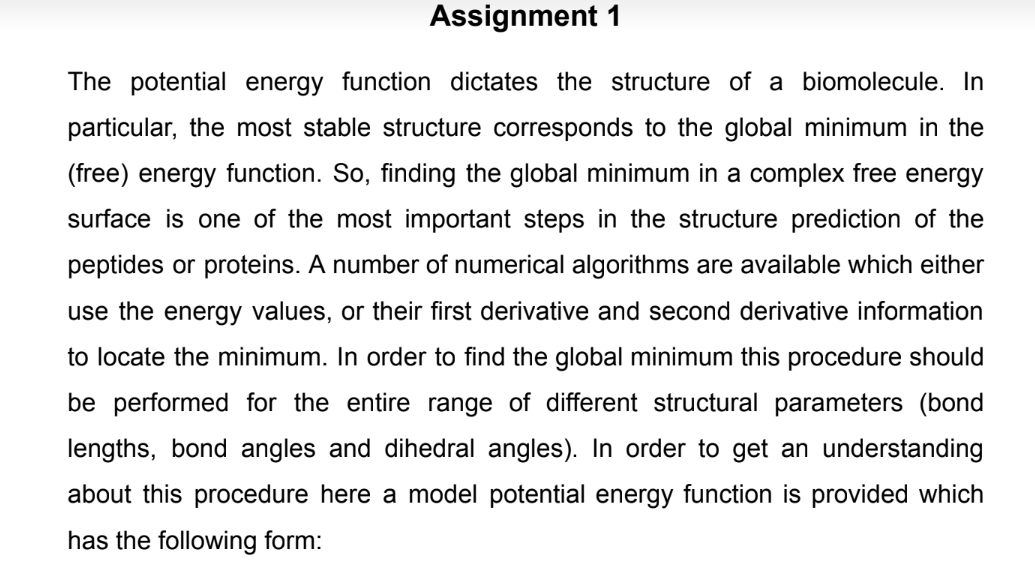

## **Equation 1**

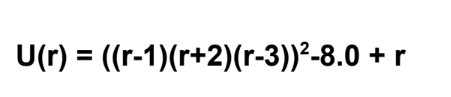

In [1]:
# Importing Modules
try:
  import matplotlib.pyplot as plt
  import numpy as np
  import time
  from tqdm import tqdm
  import logging
except Exception as e:
  print("Modules are Missing".format_map(e))

logging.basicConfig(level=logging.DEBUG)

## **Plot the potential energy function in the range -2.5 to 3.5 (use any tools such as xmgrace, grace, matlab,matplotlib)[ 1 Mark ]**

In [2]:
# potential_energy_equ : Equation of the Potential Energy Given in the Problem
def potential_energy_equ(r):
  try:
    U_r=((r - 1) * (r + 2) * (r - 3))**2 - 8.0 + r
    return U_r
  except Exception as e:
    print('Error in Equations')

In [3]:
# plot_potential_energy : function plotting the U(r) v/s r
def plot_potential_energy(r_val,u_val):
  try:
    plt.plot(r_val, u_val, label='Potential Energy Function')
    plt.title('Potential Energy Function U(r)')
    plt.xlabel('r')
    plt.ylabel('U(r)')
    plt.legend()
    plt.grid(True)
    plt.show()
  except Exception as e:
    print('Error in Plotting the Graph')

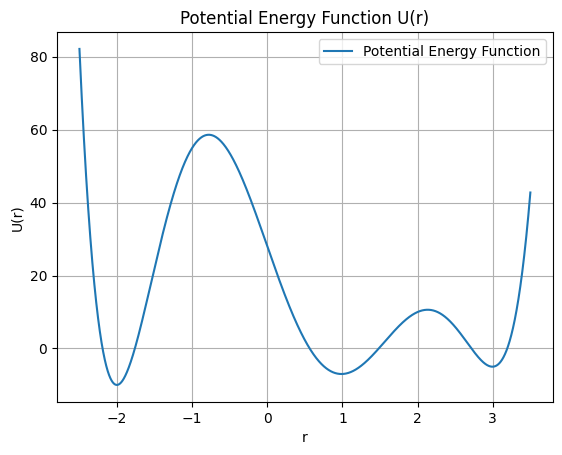

In [4]:
if  __name__=='__main__':
  try:
    r_values = np.linspace(-2.5, 3.5, 10000)
    u_values = potential_energy_equ(r_values)
    plot_potential_energy(r_values, u_values)
  except Exception as e:
    print('Error in Main Function')

## **Write a program to find all the minima in this function using Steepest descent method and Newton’s Raphson method [ 3 Mark ]**

## First and Second Derivative Function

In [5]:
# first_derivative: function to compute the first derivative.
def first_derivative(r,h=1e-6):
  try:
      derivative_val=(potential_energy_equ(r+h)-potential_energy_equ(r-h))/(2*h)
      return derivative_val
  except Exception as e:
    print('Error in First Derivative')

In [6]:
# second_derivative : function to compute the second derivative.
def second_derivative(r,h=1e-6):
  try:
    derivative_val=((potential_energy_equ(r+h))-(2*potential_energy_equ(r))+(potential_energy_equ(r-h)))/(h**2)
    return derivative_val
  except Exception as e:
    print('Error in Second Derivative')

In [7]:
# newton_raphson : function for Newton Raphson Method
def newton_raphson(guess_val, n_iter):
  try:
    r_val = guess_val
    tolerance = 1e-17
    for i in range(n_iter):
      f_derivative=first_derivative(r_val)
      s_derivative=second_derivative(r_val)
      r_val_new = r_val - (f_derivative/s_derivative)
      if abs(r_val_new - r_val) <= tolerance:
        break
      r_val = r_val_new
    # print("Total number of iterations", i)
    return r_val
  except Exception as e:
    print('Error in Newton Raphson Method')

In [46]:
start_time=time.time()
val=1000000
minima_point=0
if __name__=="__main__":
  guess_val_list=np.linspace(-3.0, 3.5, 1000)
  n_iter=1000
  newton_minima=set()
  final_minima=set()
  for val in tqdm(guess_val_list):
    minima=newton_raphson(val,n_iter)
    newton_minima.add(round(minima,5))
  print()
  print(50*'-')
  print('               Newton Raphson Method         ')
  print(50*'-')
  for minima in newton_minima:
    f_der_val=first_derivative(minima)
    s_der_val=second_derivative(minima)
    if(s_der_val>0):
      final_minima.add(minima)
      print("Local Minima : ",minima)
    if(potential_energy_equ(minima)<val):
      minima_point=minima
end_time=time.time()
execution_time=end_time-start_time
print(f'Global Minima Point r= {minima_point}')
print(f"Execution time: {execution_time} seconds")


100%|██████████| 1000/1000 [00:01<00:00, 915.69it/s]


--------------------------------------------------
               Newton Raphson Method         
--------------------------------------------------
Local Minima :  0.9862
Local Minima :  2.99495
Local Minima :  -2.00221
Global Minima Point r= -2.00221
Execution time: 1.1018037796020508 seconds


## Steepest descent method

In [9]:
# steepest descent method : function used for stepest descent method
def steppest_descent_method(guess_val, alpha_rate, num_iter):
  try:
      r_val = guess_val
      tolerance = 1e-17
      for i in range(num_iter):
        f_derivative=first_derivative(r_val)
        r_val_new = r_val - (alpha_rate*f_derivative)
        if abs(r_val_new - r_val) <= tolerance:
            break
        r_val = r_val_new
      return r_val
  except Exception as e:
    print("Error in Steppest Descent Method")

In [43]:
start_time=time.time()
val=10
minima_point=0
if __name__=='__main__':
  guess_val_list=np.linspace(-3.0, 3.5, 1000)
  steppest_minima=set()
  for val in tqdm(guess_val_list):
    minima=steppest_descent_method(val, alpha_rate=0.0001, num_iter=5000)
    steppest_minima.add(round(minima,5))
  print()
  print(50*'-')
  print('               Steepest Descent Method         ')
  print(50*'-')
  for minima in steppest_minima:
    print("Local Minima : ",minima)
    if(potential_energy_equ(minima)<val):
      minima_point=minima

end_time=time.time()
execution_time=end_time-start_time
print(f'Global Minima Point r= {minima_point}')
# print(f"Value at Global Minima = {potential_energy_equ(minima_point)}")
print(f"Execution time: {execution_time} seconds")

100%|██████████| 1000/1000 [00:06<00:00, 163.58it/s]


--------------------------------------------------
               Steepest Descent Method         
--------------------------------------------------
Local Minima :  0.9862
Local Minima :  2.99495
Local Minima :  -2.00221
Global Minima Point r= -2.00221
Execution time: 6.128850698471069 seconds


## **Provide details about the global minimum after locating all the minima. [ 0.5 Mark ]**

In [ ]:
def get_global_minima(local_minima):
  try:
    values={}
    for i in local_minima:
      values[i]=potential_energy_equ(i)
    global_minima=min(values,key=values.get)
    return global_minima
  except Exception as e:
    print('Error in Global Minima')

In [ ]:
global_minima=get_global_minima(steppest_minima)
print(f"The global minimum is at r = {global_minima}")
print(f"The Value of Potential Energy at Global Minima = {potential_energy_equ(global_minima)}")

The global minimum is at r = -2.00221
The Value of Potential Energy at Global Minima = -10.0011084847302


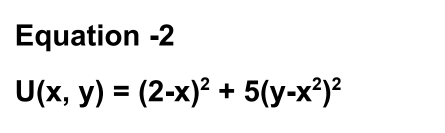

## **Write a program to find global minima in this function using Steepest descent method and Newton’s Raphson method. (Range x :[-5, 5], y:[-5, 5]) [ 2.5 Mark - Steepest descent, 2.5 Marks Newton’s Raphson ]**

In [11]:
def potential_function_eqn2(point):
  try:
    U_x_y=(2-point[0])**2+5*(point[1]-(point[0])**2)**2
    return U_x_y
  except Exception as e:
    print('Error in Equation')


In [12]:
def inverse_2x2(matrix):
  try:
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if det == 0:
        return None
    else:
        return [[matrix[1][1]/det, -matrix[0][1]/det], [-matrix[1][0]/det, matrix[0][0]/det]]
  except Exception as e:
    print('Error in Finding Inverse of Matrix')

In [13]:
def gradient_calculation(point, h=1e-5):
  try:
    grad_vector=[0.0,0.0]
    n=len(point)
    for i in range(n):
        point_plus_h = list(point.copy())
        point_plus_h[i] += h
        point_minus_h = list(point.copy())
        point_minus_h[i] -= h
        grad_vector[i] = (potential_function_eqn2(point_plus_h) - potential_function_eqn2(point_minus_h)) / (2*h)
    return grad_vector
  except Exception as e:
    print('Error in Gradient Calculation')

In [14]:
def partial_derivative(f, index=0, point=[], h=1e-6):
  try:
    arr1 = list(point.copy())
    arr1[index] -= h
    arr2 = list(point.copy())
    arr2[index] += h
    derivative_val = (f(arr2) - f(arr1)) / (2 * h)
    return derivative_val
  except Exception as e:
    print('Error in Partial Derivatiove')

In [15]:
def hessian_calculation(point):
  try:
    hessian_matrix = [[0, 0], [0, 0]]
    n_row = len(hessian_matrix)
    n_col = len(hessian_matrix[0])
    for i in range(n_row):
        for j in range(n_col):
            hessian_matrix[i][j] = partial_derivative(lambda x: partial_derivative(potential_function_eqn2, i, x), j, point)
    return hessian_matrix
  except Exception as e:
    print('Error in Hessian Calculation')

In [35]:
def steepest_descent_2_d(guess_point, alpha_rate, num_iter):
  try:
    guess_point = np.array(guess_point)
    tolerance = 1e-17
    for i in range(num_iter):
        gradient = np.array(gradient_calculation(guess_point))
        guess_point_new = guess_point - alpha_rate * gradient
        # if np.linalg.norm(guess_point_new - guess_point) < tolerance:
        #     break
        guess_point = guess_point_new
    return guess_point
  except Exception as e:
    print(f'Error in Steepest Descent Method : {e}')


In [36]:
def newton_raphson_method(guess_point, num_iter):
  try:
    for iter in range(num_iter):
        hessian = hessian_calculation(guess_point)
        inv_hessian = inverse_2x2(hessian)
        if inv_hessian is None:
            return None
        else:
            gradient = gradient_calculation(guess_point)
            for i in range(len(guess_point)):
                guess_point[i] -= sum(inv_hessian[i][j] * gradient[j] for j in range(len(gradient)))
    return guess_point
  except Exception as e:
    print('Exception in Newton Raphson Method')

In [34]:
start_time=time.time()
if __name__=="__main__":
  minima_point=set()
  x = np.linspace(-5.0, 5.0, 100)
  y = np.linspace(-5.0, 5.0, 100)
  for i in tqdm(x):
    for j in y:
      minima=steepest_descent_2_d([i,j],alpha_rate=0.01,num_iter=100)
      if minima is not None:
        minima_point.add(tuple(minima))
  minimum_val=np.inf
  global_mini=[0,0]
  for z in minima_point:
    if(potential_function_eqn2([z[0],z[1]])<minimum_val):
      global_mini[0]=z[0]
      global_mini[1]=z[1]
  print("\n--------------------------------")
  print("Global Minima ",global_mini)
  print("Value at Global Minima ",potential_function_eqn2(global_mini))

end_time=time.time()
execution_time=end_time-start_time
print(f"Execution time: {execution_time} seconds")
# Global Minima  [1.8343908627236896, 3.356577574442]
# Value at Global Minima  0.027780217176667038

100%|██████████| 100/100 [00:14<00:00,  6.74it/s]



--------------------------------
Global Minima  [1.9046668994931186, 3.6230694246774817]
Value at Global Minima  0.009198219900950816
Execution time: 14.87527346611023 seconds


In [37]:
start_time = time.time()
if __name__ == "__main__":
  minima_point = set()
  x = np.linspace(-5.0, 5.0, 100)
  y = np.linspace(-5.0, 5.0, 100)
  num_iter = 100
  for i in tqdm(x):
    for j in y:
      minima = newton_raphson_method([i,j], num_iter)
      if minima is not None:
        minima_point.add(tuple(minima))
  minimum_val = np.inf
  global_mini = [0,0]
  for z in minima_point:
    if(potential_function_eqn2([z[0], z[1]]) < minimum_val):
      global_mini[0] = z[0]
      global_mini[1] = z[1]
  print("\n--------------------------------")
  print("Global Minima ", global_mini)
  print("Value at Global Minima ", potential_function_eqn2(global_mini))

end_time=time.time()
execution_time=end_time-start_time
print(f"Execution time: {execution_time} seconds")

100%|██████████| 100/100 [00:39<00:00,  2.56it/s]


--------------------------------
Global Minima  [1.9999999980000043, 3.9999999920000175]
Value at Global Minima  3.999982898373839e-18
Execution time: 39.09842848777771 seconds
